In [6]:
# Data Analysis
import pandas as pd
import numpy as np
from numpy import asarray
from numpy import savetxt
from numpy import loadtxt
import pickle as pkl
from scipy import sparse

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import wordcloud
from wordcloud import WordCloud, STOPWORDS

# Text Processing
import re
import itertools
import string
import collections
from collections import Counter
from sklearn.preprocessing import LabelEncoder
import nltk
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

# Machine Learning packages
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import sklearn.cluster as cluster
from sklearn.manifold import TSNE

# Model training and evaluation
from sklearn.model_selection import train_test_split

#Models
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance

#Metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, multilabel_confusion_matrix, confusion_matrix
from sklearn.metrics import classification_report

# Ignore noise warning
import warnings
warnings.filterwarnings("ignore")

In [7]:
#loading dataset
data_set = pd.read_csv("C:/Users/maryy/OneDrive/Desktop/mbti_1.csv")
data_set.tail()

,type,posts
8670,ISFP,'https://www.youtube.com/watch?v=t8edHB_h908||...
8671,ENFP,'So...if this thread already exists someplace ...
8672,INTP,'So many questions when i do these things. I ...
8673,INFP,'I am very conflicted right now when it comes ...
8674,INFP,'It has been too long since I have been on per...


In [8]:
# check if there are any missing/null values 

data_set.isnull().any()

type     False
posts    False
dtype: bool

In [9]:
#dataset size 

nRow, nCol = data_set.shape

print("No. of rows is {0} and no. of columns is {1}".format(nRow,nCol))

No. of rows is 8675 and no. of columns is 2


In [10]:
# there are 16 unique personality types, INFP being the most frequently
# occuring one (1832 occurences)
# there are no repeating posts in the dataset 

data_set.describe(include=['object'])

,type,posts
count,8675,8675
unique,16,8675
top,INFP,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
freq,1832,1


In [19]:
types = np.unique(np.array(data_set['type']))

# join() concatenates the elements into a single string 
# syntax is: separator_string.join(iterable)

print("The 16 personality types are: {0}".format((", ".join(types))))


The 16 personality types are: ENFJ, ENFP, ENTJ, ENTP, ESFJ, ESFP, ESTJ, ESTP, INFJ, INFP, INTJ, INTP, ISFJ, ISFP, ISTJ, ISTP


array(['ENFJ', 'ENFP', 'ENTJ', 'ENTP', 'ESFJ', 'ESFP', 'ESTJ', 'ESTP',
       'INFJ', 'INFP', 'INTJ', 'INTP', 'ISFJ', 'ISFP', 'ISTJ', 'ISTP'],
      dtype=object)

In [35]:
# total posts for each personality type 
# we multiply by 50 because for each user we have 50 posts 
total = data_set.groupby(['type']).count()*50
total




type
ENFJ     9500
ENFP    33750
ENTJ    11550
ENTP    34250
ESFJ     2100
ESFP     2400
ESTJ     1950
ESTP     4450
INFJ    73500
INFP    91600
INTJ    54550
INTP    65200
ISFJ     8300
ISFP    13550
ISTJ    10250
ISTP    16850
Name: posts, dtype: int64

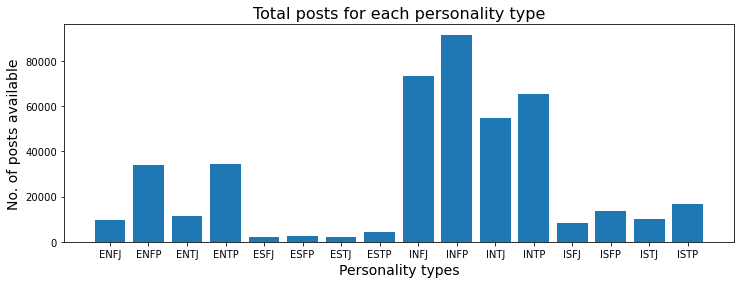

In [39]:
# let's plot the no. of posts for each personality type
# width_size = 12 , height_size = 4 
plt.figure(figsize = (12,4))

x = np.array(types)
y = total['posts']

plt.xlabel('Personality types', size = 14)
plt.ylabel('No. of posts available', size = 14)
plt.title('Total posts for each personality type', size = 16)

plt.bar(x,y)
plt.show()

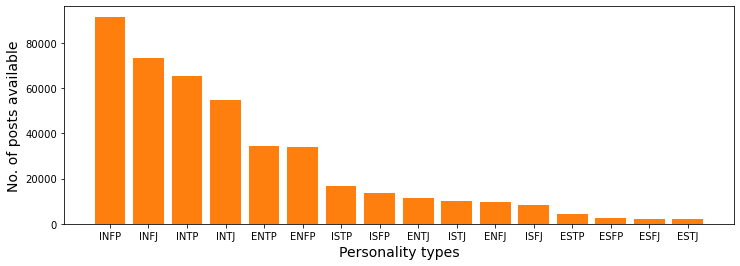

INFP    1832
INFJ    1470
INTP    1304
INTJ    1091
ENTP     685
ENFP     675
ISTP     337
ISFP     271
ENTJ     231
ISTJ     205
ENFJ     190
ISFJ     166
ESTP      89
ESFP      48
ESFJ      42
ESTJ      39
Name: type, dtype: int64

In [64]:
# plot previous barchart in descending order for a better understanding 

df = pd.DataFrame({"Personality types":x,
                  "No. of posts available":y})



plt.figure(figsize = (12,4))

plt.bar('Personality types', 'No. of posts available',data=df_sorted_desc)

plt.xlabel('Personality types', size = 14)
plt.ylabel('No. of posts available', size = 14)

plt.bar(x,y)
plt.show()


c

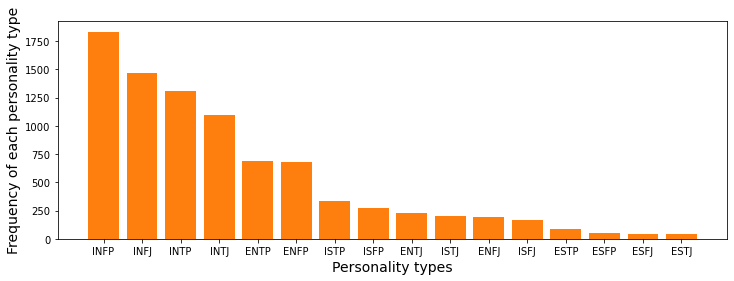

In [79]:
# plot barchart to show frequency of each personality type, in descending order 

count = data_set['type'].value_counts() 

x = count.index

y = count.values

data = {'Personality types': x,
        'Frequency of each personality type': y
       }

df = pd.DataFrame(data)

sorted = df.sort_values(by='Frequency of each personality type', ascending=False)

plt.figure(figsize = (12,4))
plt.bar('Personality types', 'Frequency of each personality type',data=sorted)

plt.xlabel('Personality types', size = 14)
plt.ylabel('Frequency of each personality type', size = 14)

plt.bar(x,y)
plt.show()

,type,posts,words_per_comment,variance_of_word_counts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,11.12,135.2900
1,ENTP,'I'm finding the lack of me in these posts ver...,23.40,187.4756
2,INTP,'Good one _____ https://www.youtube.com/wat...,16.72,180.6900
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",21.28,181.8324
4,ENTJ,'You're fired.|||That's another silly misconce...,19.34,196.4576
...,...,...,...,...
8670,ISFP,'https://www.youtube.com/watch?v=t8edHB_h908||...,15.92,125.3300
8671,ENFP,'So...if this thread already exists someplace ...,26.18,125.6144
8672,INTP,'So many questions when i do these things. I ...,18.96,169.7764
8673,INFP,'I am very conflicted right now when it comes ...,34.10,57.0336


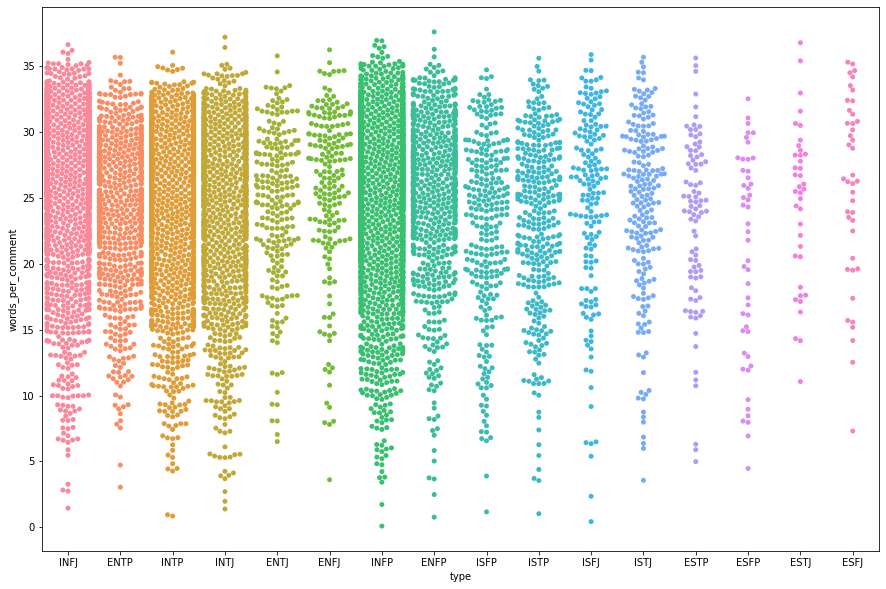

In [85]:
# SWARM PLOT for no. of words per post for each personality type 

df = data_set.copy()

#this function counts the no of words in each post of a user

def var_words_per_post(row):
    l = []
    for i in row.split("|||"):
        l.append(len(i.split()))
    return np.var(l) # Variance is a measure of dispersion of data points from the mean

#this function counts the no of words per post out of the total 50 posts in the whole row

#  Pandas.apply allow the users to pass a function and apply it on every single value of the Pandas series.
df['words_per_comment'] = df['posts'].apply(lambda x: len(x.split())/50)
df['variance_of_word_counts'] = df['posts'].apply(lambda x: var_words_per_post(x))

plt.figure(figsize=(15,10))
sns.swarmplot("type", "words_per_comment", data=df)

df
        

<Figure size 1080x720 with 0 Axes>

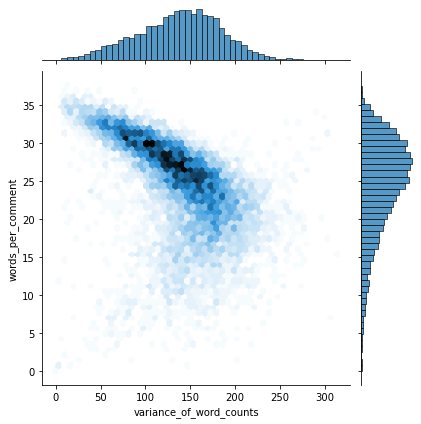

In [92]:
# Plotting the joint plot between the no. of words that occur in each comment v/s their variance
plt.figure(figsize=(15,10))

sns.jointplot('variance_of_word_counts', 'words_per_comment', data=df, kind="hex")  


['INFJ' 'ENTP' 'INTP' 'INTJ' 'ENTJ' 'ENFJ' 'INFP' 'ENFP' 'ISFP' 'ISTP'
 'ISFJ' 'ISTJ' 'ESTP' 'ESFP' 'ESTJ' 'ESFJ']
      type                                              posts  \
0     INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...   
6     INFJ  'No, I can't draw on my own nails (haha). Thos...   
8     INFJ  I'm not sure, that's a good question. The dist...   
10    INFJ  'One time my parents were fighting over my dad...   
12    INFJ  'Joe santagato - ENTP|||ENFJ or  ENTP?   I'm n...   
...    ...                                                ...   
8645  INFJ  'I play cello, and I'm also a classically trai...   
8650  INFJ  'I think the real question is whether INFJs ca...   
8655  INFJ  'I find that poster and your facial expression...   
8656  INFJ  Rim  In some approximate order, it seems like ...   
8669  INFJ  'I'm not sure about a method for picking out I...   

      words_per_comment  variance_of_word_counts  
0                 11.12                 135.2900  
6 

<Figure size 1728x360 with 0 Axes>

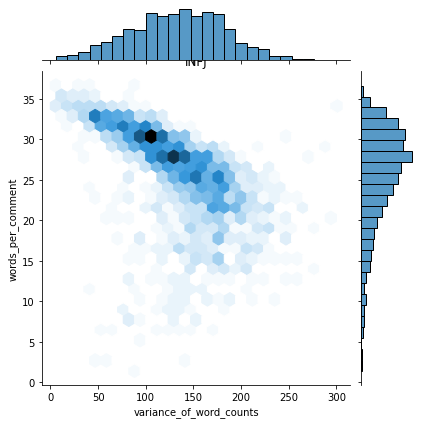

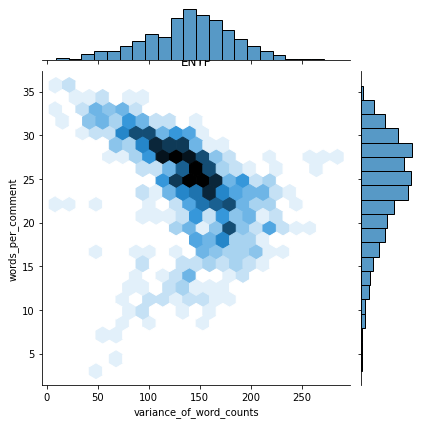

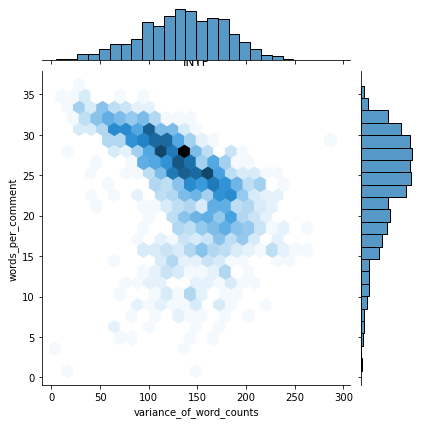

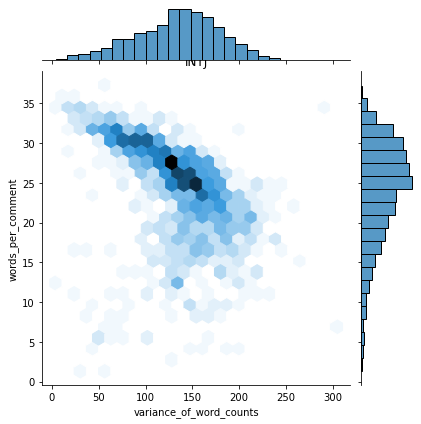

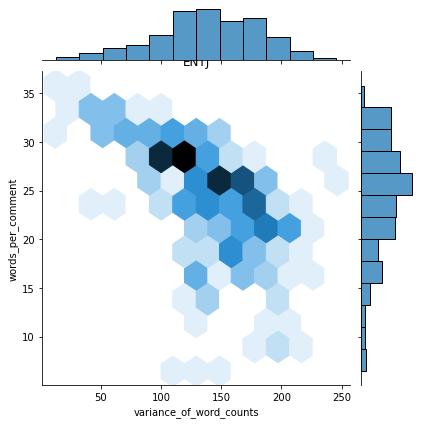

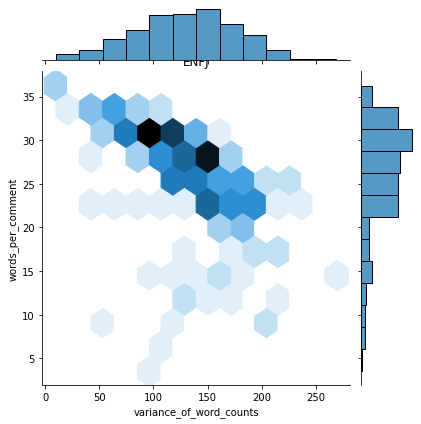

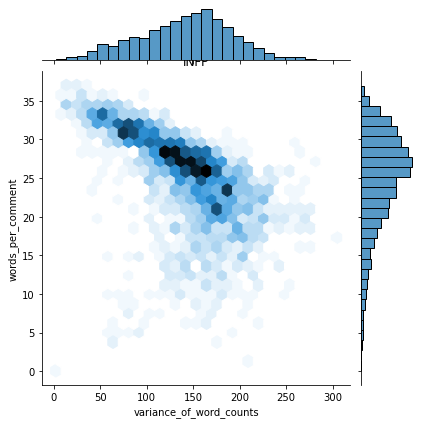

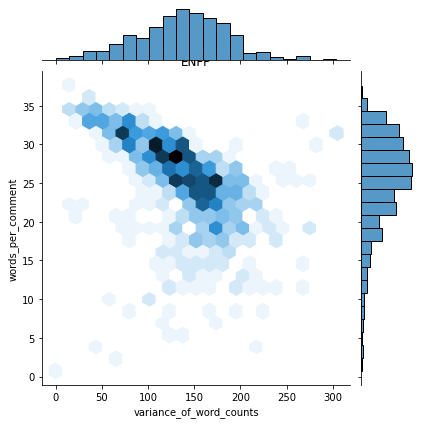

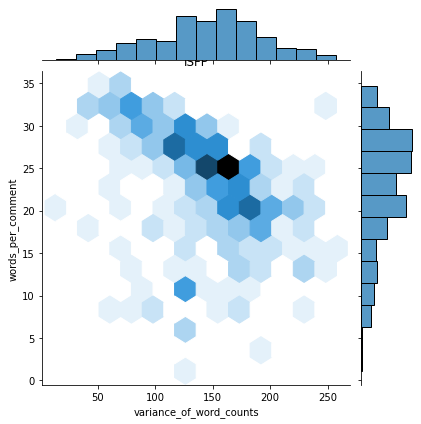

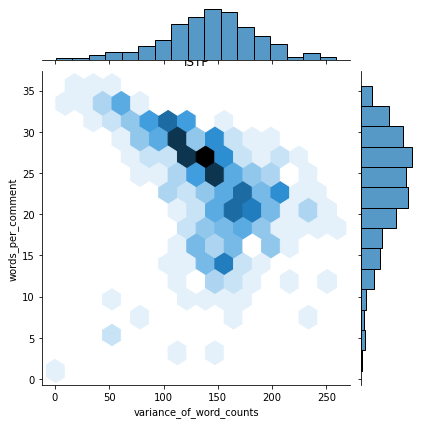

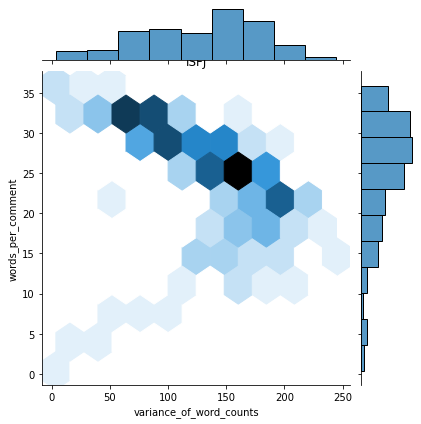

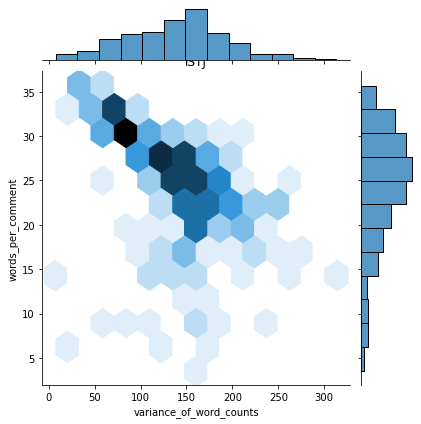

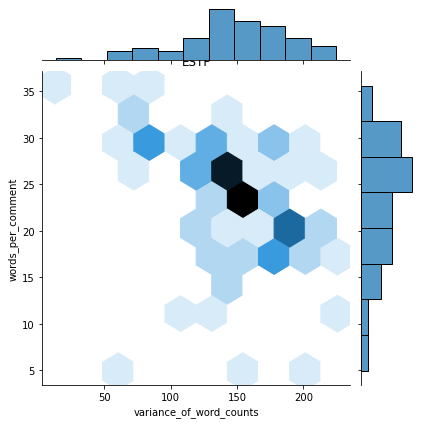

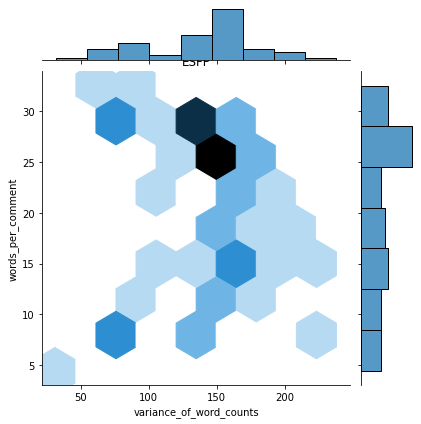

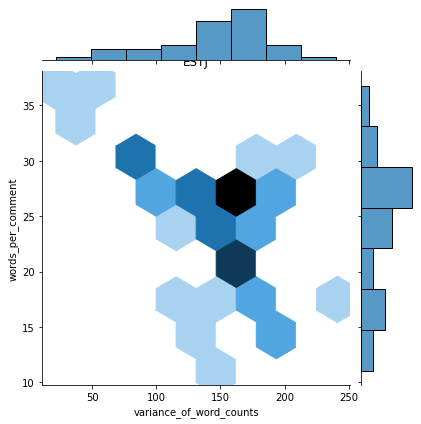

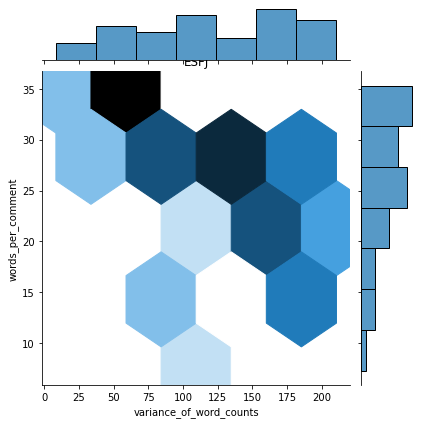

In [105]:
#  Joint Plots for each Personality Type

plt.figure(figsize=(24, 5))    
i = df['type'].unique() # each mbti type 
print(i)
k = 0

for m in range(1,3): # total no. of 16 plots 
  for n in range(1,9):
    df_1 = df[df['type'] == i[k]] # filter the data based on the current mbti type 
    a = df[df['type'] == i[k]]  
    print(a)
    sns.jointplot("variance_of_word_counts", "words_per_comment", data=df_1, kind="hex" )
    plt.title(i[k]) # i is an array 
    k+=1
plt.show()

0       'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1       'I'm finding the lack of me in these posts ver...
2       'Good one  _____   https://www.youtube.com/wat...
3       'Dear INTP,   I enjoyed our conversation the o...
4       'You're fired.|||That's another silly misconce...
                              ...                        
8670    'https://www.youtube.com/watch?v=t8edHB_h908||...
8671    'So...if this thread already exists someplace ...
8672    'So many questions when i do these things.  I ...
8673    'I am very conflicted right now when it comes ...
8674    'It has been too long since I have been on per...
Name: posts, Length: 8675, dtype: object


Text(0.5, 1.0, 'Distribution of Lengths of all 50 Posts')

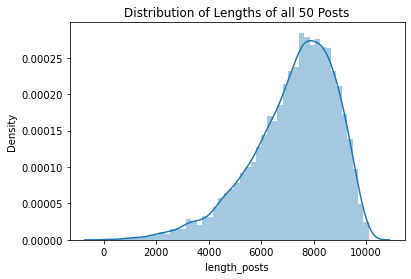

In [107]:
# distance plot 
# most lenghty posts are between 7000 and 9000 words

df["length_posts"] = df["posts"].apply(len)

print(df["posts"])
sns.distplot(df["length_posts"]).set_title("Distribution of Lengths of all 50 Posts")

In [118]:
#  most common words in all posts

words = list(df["posts"].apply(lambda x: x.split()))

words = [x for y in words for x in y]


Counter(words).most_common(40) # most common 40 words

# we observe that these words are not so relevant 
# for determining any mbti type => we need a wordcloud 


[('I', 387957),
 ('to', 290168),
 ('the', 270699),
 ('a', 230918),
 ('and', 219498),
 ('of', 177853),
 ('is', 128804),
 ('you', 128750),
 ('that', 127221),
 ('in', 117263),
 ('my', 104561),
 ('it', 93101),
 ('for', 83057),
 ('have', 79784),
 ('with', 77131),
 ('but', 74729),
 ('be', 69317),
 ('are', 65034),
 ('like', 61390),
 ('not', 59496),
 ('an', 59020),
 ("I'm", 57339),
 ('on', 57062),
 ('was', 56146),
 ('me', 55488),
 ('as', 53310),
 ('this', 52601),
 ('just', 48292),
 ('about', 46305),
 ('think', 46229),
 ('or', 45724),
 ("don't", 44821),
 ('so', 42935),
 ('your', 40918),
 ('do', 40867),
 ('what', 37746),
 ('at', 37566),
 ('can', 37535),
 ('if', 37042),
 ('people', 35546)]

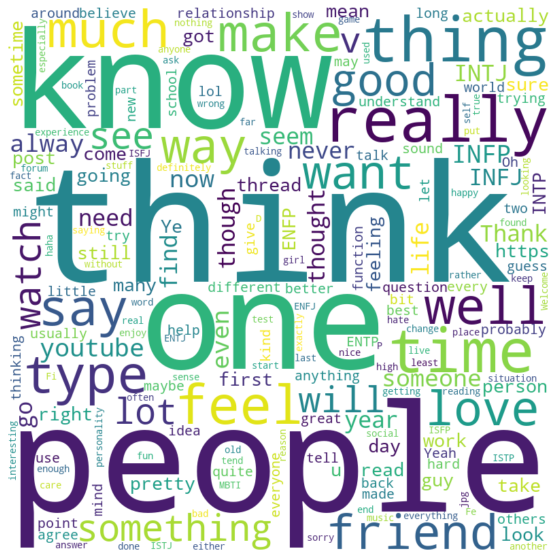

In [141]:
# we form a wordcloud 
# which shows the most common words

comment_words = ''

comment_words += " ".join(words)

wc = WordCloud(width = 800, height = 800, collocations=False,
                background_color ='white',
                min_font_size = 10).generate(comment_words)

plt.figure(figsize=(25,10))
# generate word cloud, interpolation 
plt.imshow(wc, interpolation='bilinear')
_ = plt.axis("off")

In [ ]:
# wordclouds for each personality types 